In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving E Commerce Dataset.xlsx to E Commerce Dataset.xlsx


In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Stage 1 - EDA

## **1. Statistical Descriptive**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [7]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [8]:
df[nums].describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
Kolom yang perlu diubah tipe datanya:
   - CustomerID → object
   - CityTier → Object
   - CouponUsed → Int64
   - DaySinceLastOrder → Int64
   - OrderCount → int64

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
Terdapat beberapa kolom yang memiliki null value seperti: 
   - Tenure
   - WarehouseToHome
   - HourSpendOnApp
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
   - CashbackAmount
3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
    Terdapat beberapa kolom yang memiliki data yang agak aneh seperti:
   - WarehouseToHome, nilai mean (15.6) berbeda jauh dengan max (127)
   - NumberOfAddress, nilai mean (4.2) berbeda jauh dengan max (22) <br> <br>
    Pada feature kategorikal terdapat beberapa kategori memiliki pengertian yang sama seperti:
   - PreferredLoginDevice (Mobile Phone - Phone)
   - PreferredPaymentMethod (Cash on Delivery - COD & Credit Card - CC)
   - PreferredOrderCat (Mobile - Mobile Phone)

## **2. Univariate Analysis**

In [10]:
cats = ['CustomerID', 'Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','Complain',  'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Text(0.5, 1.05, 'Apakah ada outliers pada feature?')

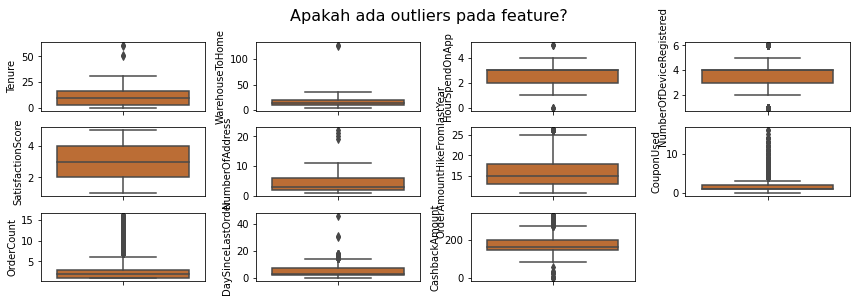

In [11]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Apakah ada outliers pada feature?', y=1.05, size=16)
# plt.savefig('image/boxplot.png')

Text(0.5, 1.05, 'Bagaimana distribusi pada feature?')

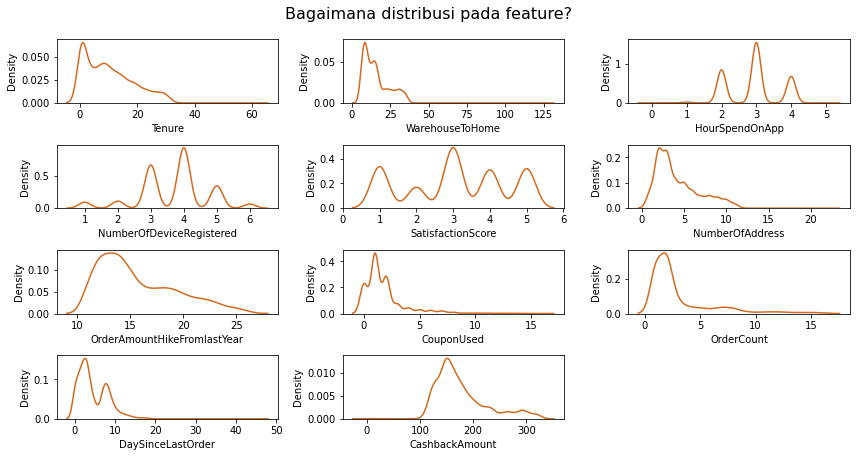

In [12]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)
# plt.savefig('image/kdeplot.png')

Text(0.5, 1.05, 'Bagaimana distribusi pada feature?')

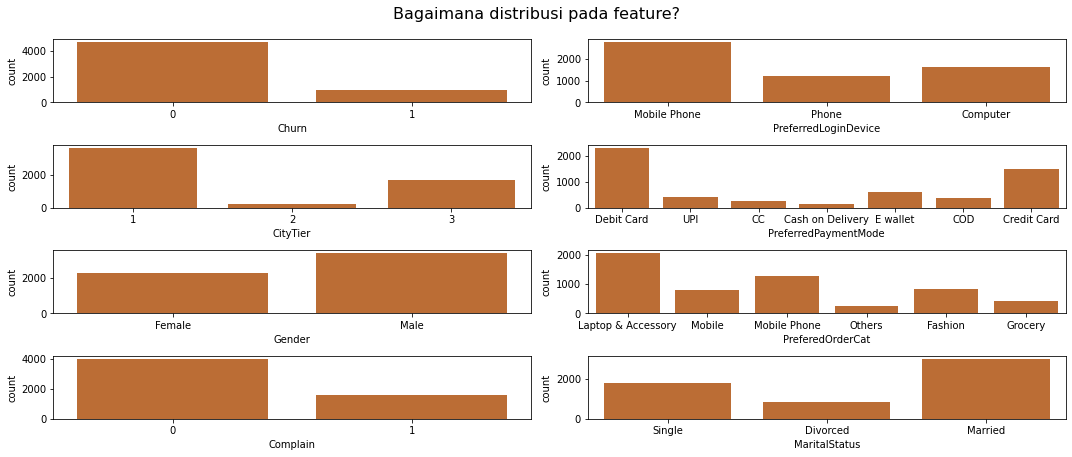

In [13]:
# kolom = ['Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'PreferedOrderCat','Complain',  'MaritalStatus']
plt.figure(figsize=(15,6))
for i in range(0, len(cats[1:])):
    plt.subplot(4, 2, i+1)
    sns.countplot(df[cats[1:][i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)
# plt.savefig('image/countplot.png')

**Insight:**
1. Hampir keseluruhan feature memiliki nilai outliers kecuali SatisfactionScore
2. Terdapat beberapa feature yang memiliki distribusi right skew, seperti:
   - Tenure
   - WarehouseToHome
   - NumberOfAddress
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
3. Terdapat beberapa feature yang memiliki bimodal, seperti HourSpendOnApp, NumberOfDeviceRegistered dan SatisfactionScore
4. Pada feature kategorikal terdapat beberapa kategori memiliki pengertian yang sama seperti:
    - PreferredLoginDevice (Mobile Phone - Phone)
    - PreferredPaymentMethod (Cash on Delivery - COD & Credit Card - CC)
    - PreferredOrderCat (Mobile - Mobile Phone)


## **3. Multivariate Analysis**

Text(0.4, 0.92, 'Correlation Heatmap')

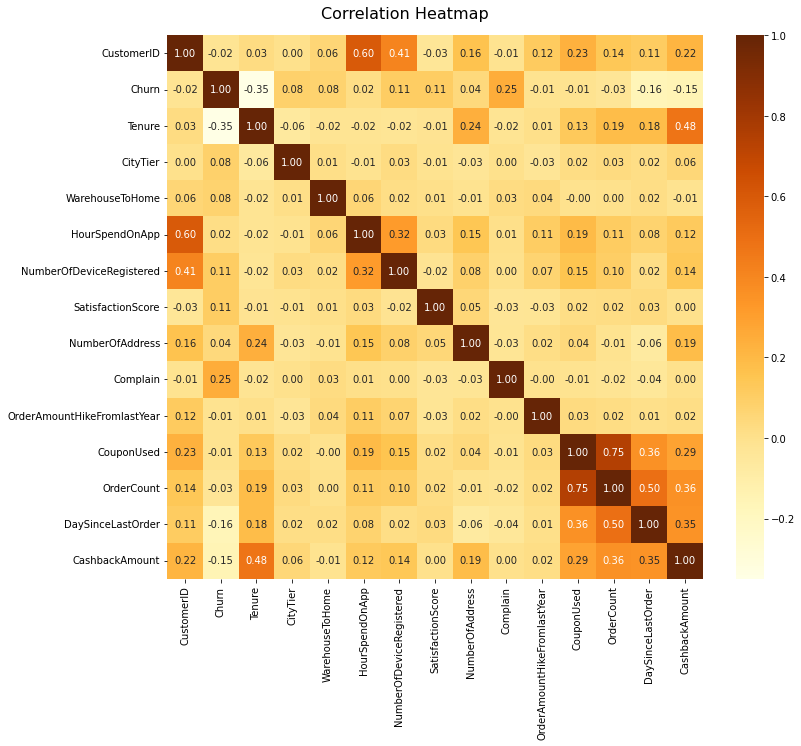

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
plt.suptitle('Correlation Heatmap',x=0.4, y=0.92, size=16)
# plt.savefig('image/heatmap.png')

**Insight:**
1. Terdapat korelasi yang cukup kuat antara feature Tenure dan label (Churn) sebesar -0.35 (negative correlation) yang berarti semakin tinggi nilai tenure maka semakin kecil kemungkinan untuk churn.
2. Terdapat korelasi antara feature Complain dan label (Churn) sebesar 0.25 (positive correlation) yang berarti semakin tinggi nilai complain, semakin tinggi kemungkinan untuk churn.


In [15]:
def churn_plot(x):
    df_cats = df.copy()
    df_city = df_cats.groupby(x)['CustomerID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn'])['CustomerID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)
    
    return df_merge

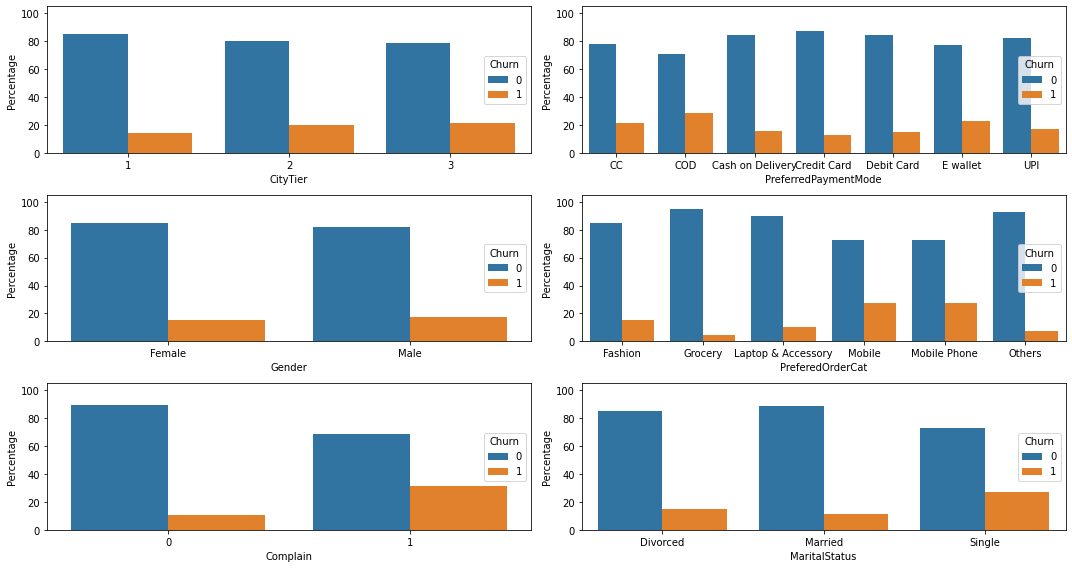

In [16]:
kolom = cats[3:]
plt.figure(figsize=(15,8))
for i in range(0, len(kolom)):
    plt.subplot(3, 2, i+1)
    data = churn_plot(kolom[i])
    ax = sns.barplot(x=kolom[i], y='Percentage', data=data, hue = 'Churn')

    for container in ax.containers:
        # ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        ax.set_ylim(top=105)
        ax.legend(loc='center right', title='Churn')
    plt.tight_layout()
# plt.savefig('image/Churn Category.png')

**Insight:**
1. Customer yang berada pada CityTier 3 memiliki kemungkinan Churn tertinggi yaitu sebesar 21.4%
2. Customer laki-laki memiliki kemungkinan Churn yang lebih tinggi yaitu sebesar 17.7%
3. Customer yang melakukan Complain memiliki kemungkinan Churn yang lebih tinggi yaitu sebesar 31.7%
4. Customer yang menggunakan metode pembayaran COD kemungkinan Churn tertinggi yaitu 28.8%
5. Customer yang melakukan transaksi pada kategori Mobile dan Mobile Phone memiliki kemungkinan untuk Churn di atas 27%
6. Customer dengan status Single memiliki kemungkinan Churn yang lebih tinggi yaitu 26.7%


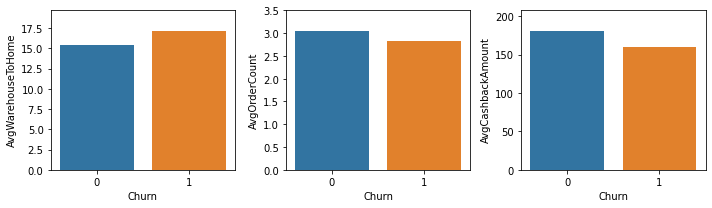

In [17]:
kolom = ['WarehouseToHome', 'OrderCount', 'CashbackAmount']
plt.figure(figsize=(10,3))
for i in range(0, len(kolom)):
    plt.subplot(1, 3, i+1)
    data = df.copy()
    data = data.groupby('Churn')[kolom[i]].mean().reset_index(name='Avg'+ kolom[i])
    ax = sns.barplot(x='Churn', y='Avg'+kolom[i], data=data)

    for container in ax.containers:
        # ax.bar_label(container, fontsize=11, fmt='%.2f')
        ax.set_ylim(top=ax.get_ylim()[1]*1.1)
    plt.tight_layout()
# plt.savefig('image/Churn Numerical.png')

**Insight:**
1. Customer yang Churn memiliki jarak yang lebih jauh dengan rata-rata jarak sebesar 17.13
2. Customer yang Churn melakukan order yang lebih sedikit dengan rata-rata order sebesar 2.82
3. Customer yang Churn mendapatkan Cashback yang lebih sedikit dengan rata-rata Cashback sebesar 160.37


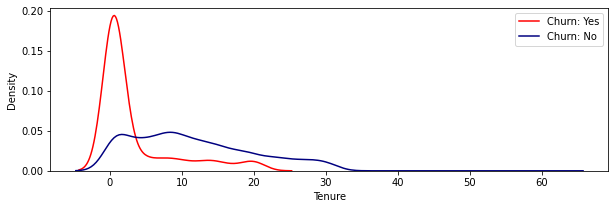

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'red', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.legend(loc = 1)
# plt.savefig('image/Churn Tenure.png')

**Insight**:

Dari grafik di atas dapat diketahui pada Tenure di bawah 5 kemungkinan customer untuk Churn sangat tinggi dan semakin lama masa berlangganan maka semakin sedikit pula kemungkinan Customer untuk Churn.

## **4. Business Insight**

1. Pelanggan banyak melakukan churn pada saat tenure berapa bulan?

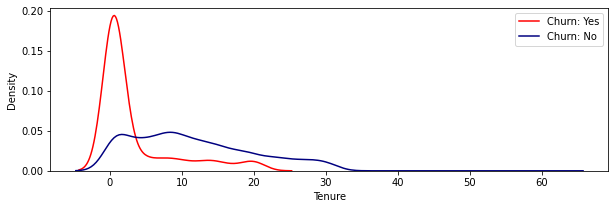

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'red', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.legend(loc = 1)

**Insight:** 

Dari grafik diatas dapat kita ketahui bahwa Customer akan Churn pada bulan-bulan awal memakai platform E-Commerce. Pada Heatmap juga memiliki skor -0.35, yang berarti bahwa semakin lama masa berlangganan maka semakin sedikit pula kemungkinan Customer untuk Churn. Rekomendasi untuk bisnis adalah, pada saat bulan-bulan awal perlu dilakukan langkah-langkah konkret untuk mempertahankan Customer agar tetap melakukan transaksi di E-Commerce PT. Numero Uno salah satunya adalah Pemberian Cashback (sebagaimana angka yang ditunjukan di heatmap, korelasi antara tenure dengan cashbackamount adalah 0.48)

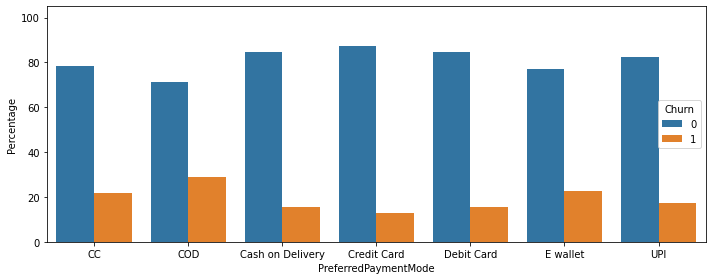

In [20]:
kolom = 'PreferredPaymentMode'
plt.figure(figsize=(10,4))
data = churn_plot(kolom)
ax = sns.barplot(x=kolom, y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    # ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=7, title='Churn')
plt.tight_layout()
# plt.savefig('image/Churn Payment Method.png')

**Insight:**

Dari grafik diatas dapat diketahui bahwa customer yang melakukan transaksi menggunakan metode COD memiliki kemungkinan Churn yang tertinggi dengan persentase 28.8%. Oleh karenanya kami menyarankan untuk meninjau kembali kualitas pelayanan pada metode pembayaran tersebut.

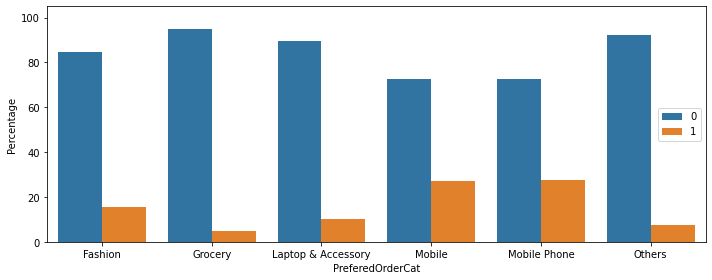

In [21]:
kolom = 'PreferedOrderCat'
plt.figure(figsize=(10,4))
data = churn_plot(kolom)
ax = sns.barplot(x=kolom, y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    # ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc='center right')
plt.tight_layout()
# plt.savefig('image/Churn Order Category.png')

**Insight:** 

Dari grafik diatas dapat diketahui bahwa customer yang melakukan transaksi pada kategori Mobile dan Mobile Phone memiliki kemungkinan Churn yang tertinggi dengan persentase lebih dari 27%. Oleh karenanya kami menyarankan untuk meninjau kembali kualitas produk yang ditawarkan pada kedua kategori tersebut.

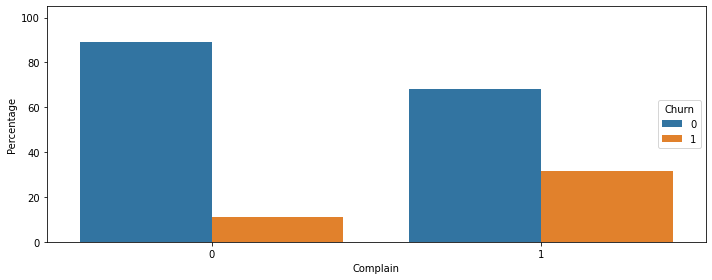

In [22]:
plt.figure(figsize=(10,4))
data = churn_plot('Complain')
ax = sns.barplot(x='Complain', y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    # ax.bar_label(container, fontsize=11, fmt='%.2f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=7, title='Churn')
plt.tight_layout()
# plt.savefig('image/Churn Complain.png')

**Insight:**

Dari grafik di atas dapat diketahui bahwa Complain banyak dilakukan oleh customer yang Churn sehingga customer yang Complain memiliki kemungkinan yang tinggi untuk Churn yakni sebesar 31.67%. Pada Heatmap juga memiliki korelasi sebesar 0.25, yang berarti bahwa semakin tinggi Jumlah Complain maka semakin tinggi pula kemungkinan Customer untuk Churn. Kami menyarankan untuk mengelompokkan jenis complain yang diterima sehingga dapat memberikan keputusan lebih bijak sesuai dengan kategori complain. Selain itu, kami juga menyarankan untuk meningkatkan kualitas pelayanan ecommerce agar complain menurun dan customer yang churn menurun.

# Stage 2 - Data Pre-processing

## 1. Data Cleaning

### Handle Missing Values

In [23]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Berdasarkan hasil Statistical Descriptive, maka yang akan kami lakukan untuk mengatasi missing value sebagai berikut:
- `Tenure`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `WarehouseToHome`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `OrderAmountHikeFromlastYear`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `CouponUsed`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `OrderCount`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `DaySinceLastOrder`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `HourSpendOnApp`: Imputasi menggunakan nilai modus

In [24]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)

In [25]:
df['CouponUsed'] = df['CouponUsed'].astype(int)
df['OrderCount'] = df['OrderCount'].astype(int)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype(int)

In [26]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Handling Duplicated Data

In [27]:
df.duplicated(subset=['CustomerID']).sum()

0

Tidak terdapat data duplikat

### Handling Outliers

In [28]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [29]:
from scipy import stats

In [30]:
df_iqr = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))
for col in nums:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 3324


In [31]:
dfz = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dfz)}')

filtered_entries = np.array([True] * len(dfz))

for col in nums:
    zscore = abs(stats.zscore(dfz[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfz = dfz[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfz)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


- IQR: data yang terbuang sebanyak 1590 atau sebesar 28.2%
- Z-score: data yang terbuang sebanyak 282 atau sebesar 5%

Kami memutuskan menggunakan nilai Z-score untuk mengatasi nilai outliers dikarenakan jumlah data yang terbuang jauh lebih kecil dibandingkan IQR

In [32]:
df = dfz.copy()

## 2. Feature Extraction

Dari hasil EDA, terdapat beberapa feature yang memerlukan penyesuaian seperti:
- PreferredLoginDevice, menggabungkan kategori **Phone** dan **Mobile Phone** -> **Phone**
- PreferredPaymentMode, menggabungkan kategori **CC** dan **Credit Card** -> **Credit Card**
- PreferredPaymentMode, menggabungkan ketegori **COD** dan **Cash on Delivery** -> **Cash on Delivery**
- PreferedOrderCat, menggabungkan kategori **Mobile** dan **Mobile Phone** -> **Mobile Phone**
- MaritalStatus, Menggabungkan ketegori **Divorced** dan **Single** -> **Single**

Terdapat feature baru yang bisa dibuat, antara lain:
- AvgCashback, Rata-rata cashback per item (CashbackAmount / OrderCount)

In [33]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2195
Credit Card         1413
E wallet             579
UPI                  401
COD                  355
CC                   273
Cash on Delivery     134
Name: PreferredPaymentMode, dtype: int64

In [34]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone','Mobile Phone'], ['Handphone', 'Handphone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile','Mobile Phone'], ['Handphone & Accessory', 'Handphone & Accessory'])
df['MaritalStatus'] = df['MaritalStatus'].replace(['Divorced'], ['Single'])

In [35]:
df['AvgCashback'] = df['CashbackAmount'] / df['OrderCount']

## 3. Feature Transformation

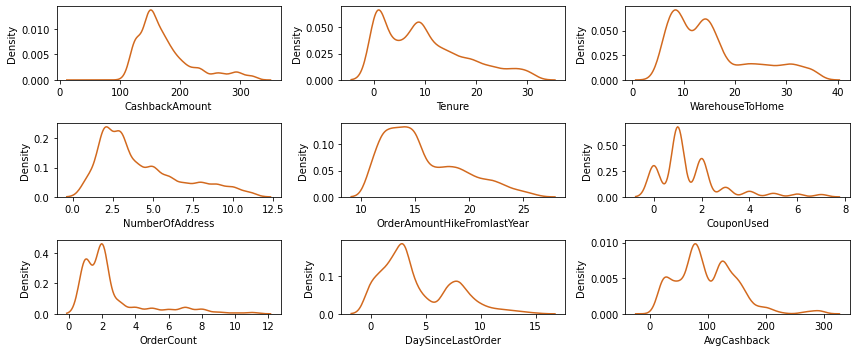

In [36]:
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[kolom[i]], color='chocolate')
    plt.tight_layout()
# plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Trial

##### Std

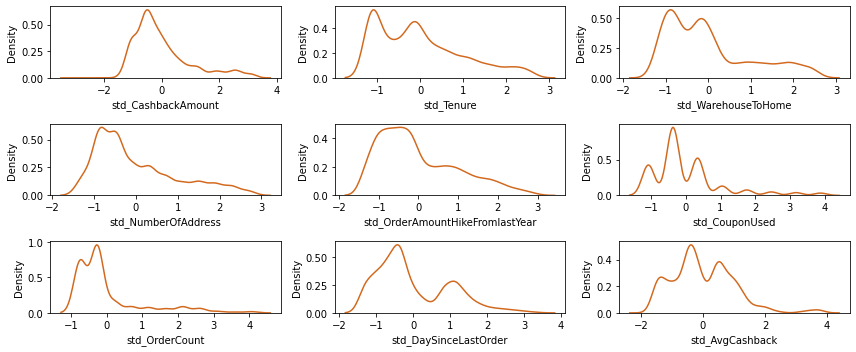

In [38]:
df_trial = df.copy()
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = 'std_' + kolom[i]
    df_trial[nama] = StandardScaler().fit_transform(df_trial[kolom[i]].values.reshape(len(df_trial), 1))
    sns.kdeplot(df_trial[nama], color='chocolate')
    plt.tight_layout()

In [39]:
df_trial.describe() # std

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback,std_CashbackAmount,std_Tenure,std_WarehouseToHome,std_NumberOfAddress,std_OrderAmountHikeFromlastYear,std_CouponUsed,std_OrderCount,std_DaySinceLastOrder,std_AvgCashback
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,...,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03
mean,52802.826168,0.170467,9.804112,1.652710,15.541308,2.929720,3.675140,3.056449,4.196449,0.286355,...,98.717871,5.099970e-16,7.171833e-17,7.437457e-17,2.124988e-17,9.562444e-17,-8.499950e-17,1.062494e-16,4.249975e-17,1.699990e-16
std,1627.280475,0.376078,8.178609,0.913816,8.066006,0.701942,1.026057,1.378802,2.544520,0.452100,...,51.930374,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.111111,-2.957067e+00,-1.198863e+00,-1.307003e+00,-1.256326e+00,-1.304506e+00,-1.078464e+00,-7.477119e-01,-1.294154e+00,-1.821970e+00
25%,51394.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,63.627500,-6.284652e-01,-9.542994e-01,-8.110482e-01,-8.632882e-01,-7.448567e-01,-3.699937e-01,-7.477119e-01,-6.825447e-01,-6.757828e-01
50%,52784.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,89.372500,-2.828504e-01,-9.832813e-02,-1.911048e-01,-4.702500e-01,-1.852073e-01,-3.699937e-01,-2.680071e-01,-3.767400e-01,-1.799765e-01
75%,54208.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,130.160000,3.641027e-01,6.353615e-01,5.528273e-01,7.088646e-01,6.542668e-01,3.384767e-01,2.116978e-01,8.464789e-01,6.055236e-01
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,298.590000,3.227246e+00,2.591867e+00,2.536646e+00,2.674056e+00,2.892864e+00,3.880828e+00,4.049336e+00,3.292917e+00,3.849208e+00


##### Log

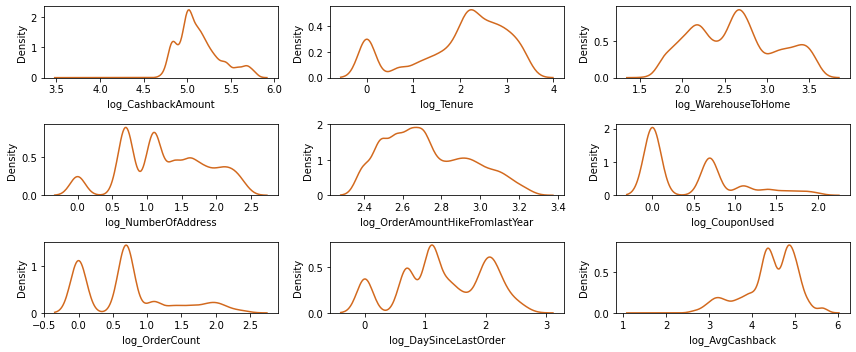

In [40]:
df_trial = df.copy()
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = 'log_' + kolom[i]
    df_trial[nama] = np.log(df_trial[kolom[i]])
    sns.kdeplot(df_trial[nama], color='chocolate')
    plt.tight_layout()

In [41]:
df_trial.describe() # log

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback,log_CashbackAmount,log_Tenure,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_CouponUsed,log_OrderCount,log_DaySinceLastOrder,log_AvgCashback
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,...,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000
mean,52802.826168,0.170467,9.804112,1.652710,15.541308,2.929720,3.675140,3.056449,4.196449,0.286355,...,98.717871,5.131378,-inf,2.617250,1.252686,2.726877,-inf,0.702818,-inf,4.428559
std,1627.280475,0.376078,8.178609,0.913816,8.066006,0.701942,1.026057,1.378802,2.544520,0.452100,...,51.930374,0.242007,NaN,0.499248,0.613167,0.217536,NaN,0.645036,NaN,0.619511
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.111111,3.610918,-inf,1.609438,0.000000,2.397895,-inf,0.000000,-inf,1.413693
25%,51394.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,63.627500,4.979076,0.693147,2.197225,0.693147,2.564949,0.000000,0.000000,0.693147,4.153045
50%,52784.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,89.372500,5.084010,2.197225,2.639057,1.098612,2.708050,0.000000,0.693147,1.098612,4.492813
75%,54208.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,130.160000,5.254992,2.708050,2.995732,1.791759,2.890372,0.693147,1.098612,1.945910,4.868764
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,298.590000,5.782994,3.433987,3.583519,2.397895,3.258097,1.945910,2.397895,2.708050,5.699071


##### Norm

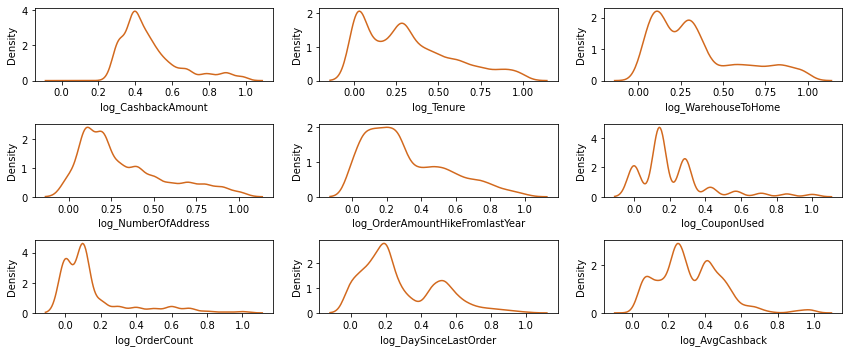

In [42]:
df_trial = df.copy()
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = 'log_' + kolom[i]
    df_trial[nama] = MinMaxScaler().fit_transform(df_trial[kolom[i]].values.reshape(len(df_trial), 1))
    sns.kdeplot(df_trial[nama], color='chocolate')
    plt.tight_layout()

In [43]:
df_trial.describe() # Norm

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback,log_CashbackAmount,log_Tenure,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_CouponUsed,log_OrderCount,log_DaySinceLastOrder,log_AvgCashback
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,...,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000
mean,52802.826168,0.170467,9.804112,1.652710,15.541308,2.929720,3.675140,3.056449,4.196449,0.286355,...,98.717871,0.478156,0.316262,0.340042,0.319645,0.310791,0.217463,0.155869,0.282131,0.321268
std,1627.280475,0.376078,8.178609,0.913816,8.066006,0.701942,1.026057,1.378802,2.544520,0.452100,...,51.930374,0.161715,0.263826,0.260194,0.254452,0.238267,0.201661,0.208481,0.218024,0.176347
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51394.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,63.627500,0.376534,0.064516,0.129032,0.100000,0.133333,0.142857,0.000000,0.133333,0.202107
50%,52784.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,89.372500,0.432419,0.290323,0.290323,0.200000,0.266667,0.142857,0.100000,0.200000,0.289533
75%,54208.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,130.160000,0.537031,0.483871,0.483871,0.500000,0.466667,0.285714,0.200000,0.466667,0.428040
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,298.590000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Log Transformation

- Log transformation: `WarehouseToHome` dan `AvgCashback` karena memiliki long right tailed
- Standardization: Semua kolom yang right skew dan kolom yang telah di log transformasi

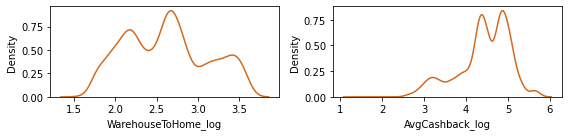

In [44]:
plt.figure(figsize=(8,2))
kolom = ['WarehouseToHome','AvgCashback']
for i in range(0, len(kolom)):
    plt.subplot(1, 2, i+1)
    nama = kolom[i] + '_log'
    df[nama] = np.log(df[kolom[i]])
    sns.kdeplot(df[nama], color='chocolate')
    plt.tight_layout()

### Standardization

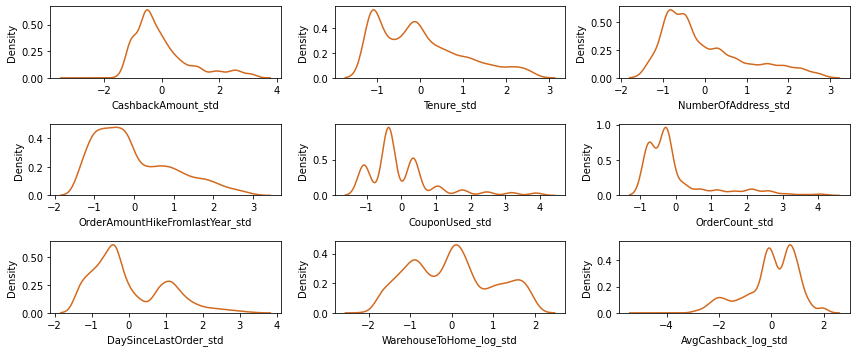

In [45]:
kolom = ['CashbackAmount', 'Tenure', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
         'DaySinceLastOrder', 'WarehouseToHome_log', 'AvgCashback_log']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = kolom[i] + '_std'
    df[nama] = StandardScaler().fit_transform(df[kolom[i]].values.reshape(len(df),1))
    sns.kdeplot(df[nama], color='chocolate')
    plt.tight_layout()

In [46]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback_log,CashbackAmount_std,Tenure_std,NumberOfAddress_std,OrderAmountHikeFromlastYear_std,CouponUsed_std,OrderCount_std,DaySinceLastOrder_std,WarehouseToHome_log_std,AvgCashback_log_std
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,...,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03
mean,52802.826168,0.170467,9.804112,1.652710,15.541308,2.929720,3.675140,3.056449,4.196449,0.286355,...,4.428559,5.099970e-16,7.171833e-17,2.124988e-17,9.562444e-17,-8.499950e-17,1.062494e-16,4.249975e-17,-2.124988e-17,3.824978e-16
std,1627.280475,0.376078,8.178609,0.913816,8.066006,0.701942,1.026057,1.378802,2.544520,0.452100,...,0.619511,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.413693,-2.957067e+00,-1.198863e+00,-1.256326e+00,-1.304506e+00,-1.078464e+00,-7.477119e-01,-1.294154e+00,-2.018848e+00,-4.866981e+00
25%,51394.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,4.153045,-6.284652e-01,-9.542994e-01,-8.632882e-01,-7.448567e-01,-3.699937e-01,-7.477119e-01,-6.825447e-01,-8.413949e-01,-4.447694e-01
50%,52784.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,4.492813,-2.828504e-01,-9.832813e-02,-4.702500e-01,-1.852073e-01,-3.699937e-01,-2.680071e-01,-3.767400e-01,4.368384e-02,1.037266e-01
75%,54208.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,4.868764,3.641027e-01,6.353615e-01,7.088646e-01,6.542668e-01,3.384767e-01,2.116978e-01,8.464789e-01,7.581746e-01,7.106354e-01
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,5.699071,3.227246e+00,2.591867e+00,2.674056e+00,2.892864e+00,3.880828e+00,4.049336e+00,3.292917e+00,1.935628e+00,2.051023e+00


## 4. Feature Encoding

- Label Encoding: `Gender`, `MaritalStatus`
- One Hot Encoder: `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferedOrderCat`

In [47]:
map_gender = {
    'Female' : 0,
    'Male' : 1
}

map_marital = {
    'Single' : 0,
    'Married' : 1
}

df['Gender'] = df['Gender'].map(map_gender)
df['MaritalStatus'] = df['MaritalStatus'].map(map_marital)

In [48]:
for cat in ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [49]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Handphone & Accessory,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Others
0,50001,1,4.0,Handphone,3,6.0,Debit Card,0,3.0,3,...,0,0,1,0,0,0,0,0,1,0
1,50002,1,9.0,Handphone,1,8.0,UPI,1,3.0,4,...,0,0,0,0,1,0,0,1,0,0
2,50003,1,9.0,Handphone,1,30.0,Debit Card,1,2.0,4,...,0,0,1,0,0,0,0,1,0,0
3,50004,1,0.0,Handphone,3,15.0,Debit Card,1,2.0,4,...,0,0,1,0,0,0,0,0,1,0
4,50005,1,0.0,Handphone,1,12.0,Credit Card,1,3.0,3,...,0,1,0,0,0,0,0,1,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CustomerID                              5350 non-null   int64  
 1   Churn                                   5350 non-null   int64  
 2   Tenure                                  5350 non-null   float64
 3   PreferredLoginDevice                    5350 non-null   object 
 4   CityTier                                5350 non-null   int64  
 5   WarehouseToHome                         5350 non-null   float64
 6   PreferredPaymentMode                    5350 non-null   object 
 7   Gender                                  5350 non-null   int64  
 8   HourSpendOnApp                          5350 non-null   float64
 9   NumberOfDeviceRegistered                5350 non-null   int64  
 10  PreferedOrderCat                        5350 non-null   obje

### Drop Outdated Column

In [51]:
df = df.drop(columns = ['CustomerID', 'Tenure', 'PreferredLoginDevice', 'WarehouseToHome', 'PreferredPaymentMode',
                              'PreferedOrderCat', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                              'DaySinceLastOrder', 'CashbackAmount', 'AvgCashback', 'WarehouseToHome_log',
                              'AvgCashback_log']) 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Churn                                   5350 non-null   int64  
 1   CityTier                                5350 non-null   int64  
 2   Gender                                  5350 non-null   int64  
 3   HourSpendOnApp                          5350 non-null   float64
 4   NumberOfDeviceRegistered                5350 non-null   int64  
 5   SatisfactionScore                       5350 non-null   int64  
 6   MaritalStatus                           5350 non-null   int64  
 7   Complain                                5350 non-null   int64  
 8   CashbackAmount_std                      5350 non-null   float64
 9   Tenure_std                              5350 non-null   float64
 10  NumberOfAddress_std                     5350 non-null   floa

## 5. Feature Selection

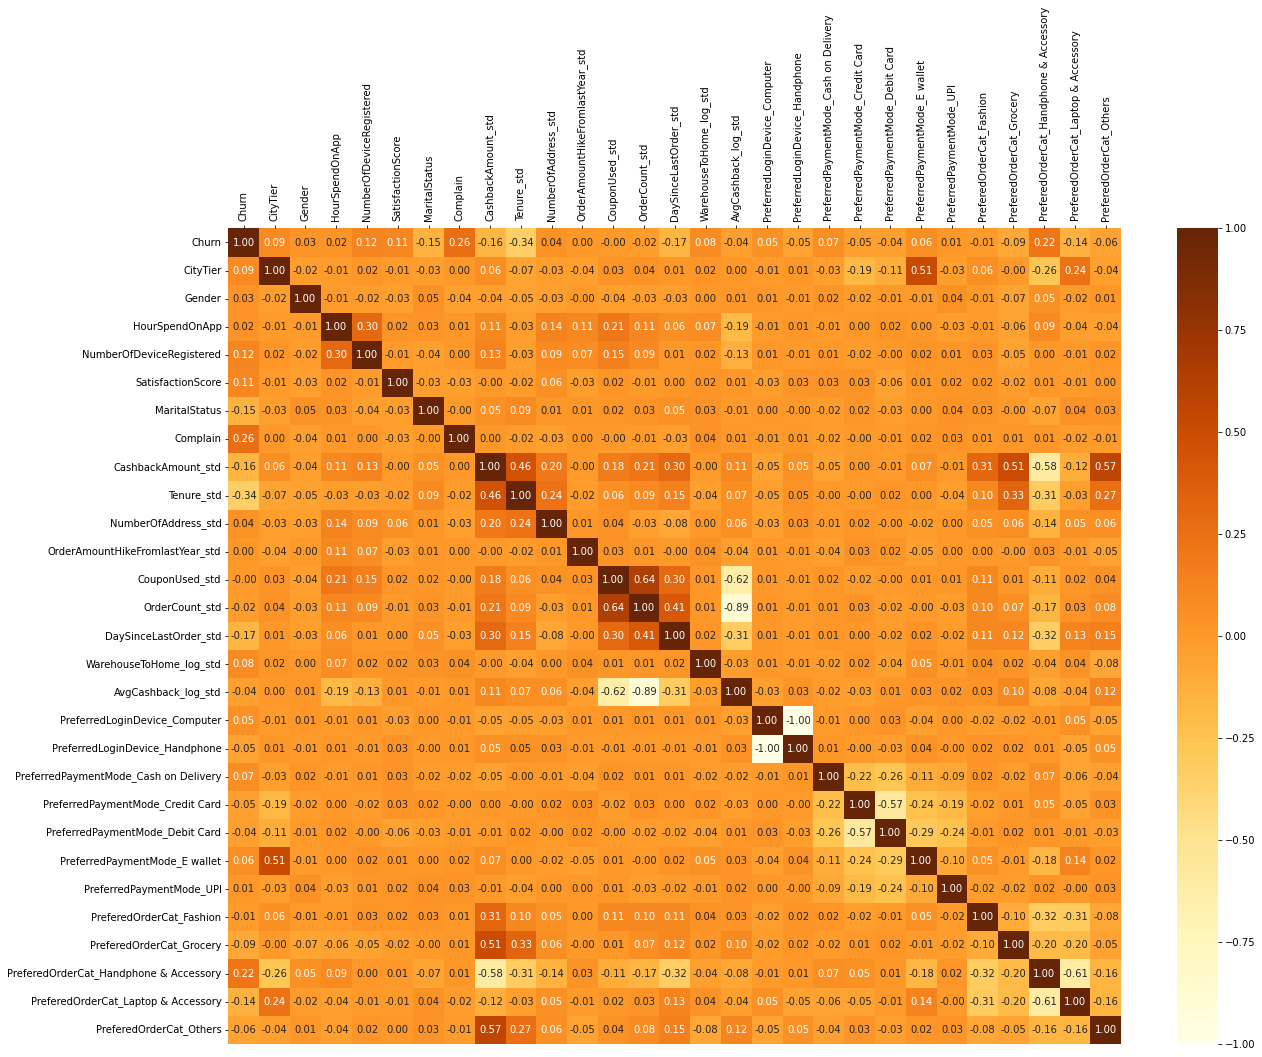

In [53]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()
# plt.savefig('heatmap.png', bbox_inches = 'tight')

Berdasarkan nilai korelasi pada heatmap, feature yang memiliki korelasi tertinggi dengan target adalah Tenure_std dengan nilai -0.34. Oleh karena itu, kami memutuskan untuk membuang feature yang memiliki korelasi dibawah 0.1. Sehingga hanya terdapat 9 feature yang akan kami gunakan pada tahap selanjutnya.

In [54]:
df_final = df[['Churn', 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'MaritalStatus', 'Complain', 'CashbackAmount_std',
                    'Tenure_std', 'DaySinceLastOrder_std', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Handphone & Accessory', 
                    'PreferedOrderCat_Laptop & Accessory']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Churn                                   5350 non-null   int64  
 1   CityTier                                5350 non-null   int64  
 2   NumberOfDeviceRegistered                5350 non-null   int64  
 3   SatisfactionScore                       5350 non-null   int64  
 4   MaritalStatus                           5350 non-null   int64  
 5   Complain                                5350 non-null   int64  
 6   CashbackAmount_std                      5350 non-null   float64
 7   Tenure_std                              5350 non-null   float64
 8   DaySinceLastOrder_std                   5350 non-null   float64
 9   PreferedOrderCat_Grocery                5350 non-null   uint8  
 10  PreferedOrderCat_Handphone & Accessory  5350 non-null   uint

## 6. Handling Imbalance Data

In [55]:
df_final['Churn'].value_counts()

0    4438
1     912
Name: Churn, dtype: int64

Dari nilai di atas, terdapat ketimpangan data pada target yaitu kolom `Churn`. Dimana customer yang Churn hanya sebesar 17% dari keseluruhan data pada target. Untuk mengatasinya akan dilakukan oversampling menggunakan SMOTE sehingga dapat meminimalisir terjadinya data duplikat.

In [56]:
X = df_final.drop('Churn',axis=1)
y = df_final['Churn'].values
print(X.shape)
print(y.shape)

(5350, 11)
(5350,)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [58]:
from imblearn import over_sampling

In [59]:
X_smote, y_smote = over_sampling.SMOTE(random_state=123).fit_resample(X_train, y_train)

In [60]:
print(X_smote.shape)
print(y_smote.shape)

(6216, 11)
(6216,)


In [61]:
print('Original')
print(pd.Series(y).value_counts())
print('Train')
print(pd.Series(y_train).value_counts())
print('SMOTE')
print(pd.Series(y_smote).value_counts())

Original
0    4438
1     912
dtype: int64
Train
0    3108
1     637
dtype: int64
SMOTE
0    3108
1    3108
dtype: int64


# Stage 3 - Modelling

In [62]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score, roc_curve, confusion_matrix, make_scorer

## Basic Modelling

In [63]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
kn_sm = KNeighborsClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()

In [64]:
from sklearn.model_selection import cross_validate

def eval_classification(model):
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    acc = accuracy_score(y_test, y_pred)
    acc1 = accuracy_score(y_train, y_pred_train)
    prec = precision_score(y_test, y_pred)
    prec1 = precision_score(y_train, y_pred_train)
    rec = recall_score(y_test, y_pred)
    rec1 = recall_score(y_train, y_pred_train)
    f1 = f1_score(y_test, y_pred)
    f11 = f1_score(y_train, y_pred_train)
    f2 = fbeta_score(y_test, y_pred, pos_label=0,  beta=2)
    f21 = fbeta_score(y_train, y_pred_train, pos_label=0,  beta=2)
    roc_auc_proba = roc_auc_score(y_test, y_pred_proba[:, 1])
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_cv_test = (score['test_score'].mean())
    roc_auc_cv_train = (score['train_score'].mean())
    
    results = {'Accuracy (Test Set)': acc,
               'Accuracy (Train Set)': acc1,
               'Precision (Test Set)': prec,
               'Precision (Train Set)': prec1,
               'Recall (Test Set)': rec,
               'Recall (Train Set)': rec1,
               'F1-Score (Test Set)': f1,
               'F1-Score (Train Set)': f11,
               'F2-Score (Test Set)' : f2,
               'F2-Score (Train Set)' : f21,
               'roc_auc (test-proba)': roc_auc_proba,
               'roc_auc (train-proba)': roc_auc_train,
               'roc_auc (crossval test)': roc_auc_cv_test,
               'roc_auc (crossval train)': roc_auc_cv_train}
    return results

In [65]:
model_list = [lr_sm, dt_sm, kn_sm, rf_sm, ab_sm, gb_sm, xg_sm]
results_list = []
for model in model_list:
    results = eval_classification(model)
    results_list.append(results)

In [66]:
df_results = pd.DataFrame(results_list, index=['Logistic Regression',
                                               'Decision Tree',
                                               'KNeighbors',
                                               'Random Forest',
                                               'AdaBoost',
                                               'Gradient Boosting',
                                               'XGBoost'])

df_results

,Accuracy (Test Set),Accuracy (Train Set),Precision (Test Set),Precision (Train Set),Recall (Test Set),Recall (Train Set),F1-Score (Test Set),F1-Score (Train Set),F2-Score (Test Set),F2-Score (Train Set),roc_auc (test-proba),roc_auc (train-proba),roc_auc (crossval test),roc_auc (crossval train)
Logistic Regression,0.785047,0.770895,0.432950,0.411952,0.821818,0.811617,0.567127,0.546512,0.807434,0.794129,0.872394,0.866294,0.872491,0.873453
Decision Tree,0.920249,1.000000,0.750853,1.000000,0.800000,1.000000,0.774648,1.000000,0.947678,1.000000,0.872556,1.000000,0.958262,1.000000
KNeighbors,0.835514,0.898264,0.512415,0.630081,0.825455,0.973312,0.632312,0.764960,0.859303,0.903047,0.894752,0.987326,0.924319,0.965556
Random Forest,0.932710,1.000000,0.792982,1.000000,0.821818,1.000000,0.807143,1.000000,0.957078,1.000000,0.966340,1.000000,0.991340,1.000000
AdaBoost,0.826791,0.835247,0.496629,0.510040,0.803636,0.797488,0.613889,0.622168,0.853395,0.862921,0.900037,0.906301,0.909384,0.916910
Gradient Boosting,0.856075,0.870761,0.556122,0.583607,0.792727,0.838305,0.653673,0.688144,0.884739,0.893395,0.915208,0.935889,0.929165,0.942189
XGBoost,0.923364,0.989586,0.767606,0.965732,0.792727,0.973312,0.779964,0.969507,0.951664,0.993241,0.961583,0.999158,0.991789,0.999880


Metric yang akan digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah klasifikasi kali adalah dengan F2 score. F2 Score adalah metric klasifikasi yang menggunakan pemberatan rata-rata harmonis dari precision dan recall. Berbeda dengan F1 score yang memberikan bobot seimbang pada precision dan recall, F2 score lebih menitikberatkan/ memberikan bobot kepada 'recall' daripada 'precision'. Penggunaan F2 score sebagai metric dari model yang dipakai, sejalan dengan business model yang sudah dijelaskan di awal.



## Hyperparameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
f2_scorer = make_scorer(fbeta_score, pos_label=0, beta=2)

### Ada Boost

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 50)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring= f2_scorer)
ab_tuned.fit(X_smote,y_smote)

# Predict & Evaluation
eval_classification(ab_tuned)

{'Accuracy (Test Set)': 0.8292834890965732,
 'Accuracy (Train Set)': 0.8392523364485981,
 'Precision (Test Set)': 0.5013054830287206,
 'Precision (Train Set)': 0.5216316440049443,
 'Recall (Test Set)': 0.6981818181818182,
 'Recall (Train Set)': 0.6624803767660911,
 'F1-Score (Test Set)': 0.5835866261398176,
 'F1-Score (Train Set)': 0.5836791147994468,
 'F2-Score (Test Set)': 0.8705288902476306,
 'F2-Score (Train Set)': 0.8852811035918792,
 'roc_auc (test-proba)': 0.8779507860560493,
 'roc_auc (train-proba)': 0.8724411505023749,
 'roc_auc (crossval test)': 0.8596131394358748,
 'roc_auc (crossval train)': 0.8629306660707081}

### Gradient Boost

In [69]:
from scipy.stats import randint as sp_randint
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': sp_randint(50, 100),
    'max_depth': sp_randint(1, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

# Init model
n_iter_search = 50 
gb = GradientBoostingClassifier(random_state=42)
gb_tuned = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, scoring=f2_scorer, 
                              n_iter=n_iter_search, cv=5, n_jobs=-1) # Use parallel processing to speed up the search
gb_tuned.fit(X_smote, y_smote)

# Predict and Evaluation
eval_classification(gb_tuned)

{'Accuracy (Test Set)': 0.9414330218068536,
 'Accuracy (Train Set)': 1.0,
 'Precision (Test Set)': 0.8267148014440433,
 'Precision (Train Set)': 1.0,
 'Recall (Test Set)': 0.8327272727272728,
 'Recall (Train Set)': 1.0,
 'F1-Score (Test Set)': 0.8297101449275363,
 'F1-Score (Train Set)': 1.0,
 'F2-Score (Test Set)': 0.9641997593261132,
 'F2-Score (Train Set)': 1.0,
 'roc_auc (test-proba)': 0.9681066302118932,
 'roc_auc (train-proba)': 1.0,
 'roc_auc (crossval test)': 0.9945350678163669,
 'roc_auc (crossval train)': 0.9999998456492378}

### XG Boost

In [70]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(1, 51, num = 50)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring= f2_scorer)
xg_tuned.fit(X_smote,y_smote)

# Predict & Evaluation
eval_classification(xg_tuned)

{'Accuracy (Test Set)': 0.92398753894081,
 'Accuracy (Train Set)': 0.9895861148197597,
 'Precision (Test Set)': 0.7628865979381443,
 'Precision (Train Set)': 0.9585889570552147,
 'Recall (Test Set)': 0.8072727272727273,
 'Recall (Train Set)': 0.9811616954474097,
 'F1-Score (Test Set)': 0.784452296819788,
 'F1-Score (Train Set)': 0.969743987587277,
 'F2-Score (Test Set)': 0.9504069942719325,
 'F2-Score (Train Set)': 0.9922705314009661,
 'roc_auc (test-proba)': 0.9608817498291183,
 'roc_auc (train-proba)': 0.9992479023091267,
 'roc_auc (crossval test)': 0.9843435222873188,
 'roc_auc (crossval train)': 0.9981888432462955}

## Classification Report

In [71]:
y_train_pred_xg = xg_tuned.predict(X_train)
y_test_pred_xg = xg_tuned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_xg, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_xg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_xg))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_xg, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_xg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_xg))

TRAINING RESULT:
F2 Score: 0.992
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3108
           1       0.96      0.98      0.97       637

    accuracy                           0.99      3745
   macro avg       0.98      0.99      0.98      3745
weighted avg       0.99      0.99      0.99      3745

Confussion Matrix ------------------------------------
[[3081   27]
 [  12  625]]


TESTING RESULT:
F2 Score: 0.95
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1330
           1       0.76      0.81      0.78       275

    accuracy                           0.92      1605
   macro avg       0.86      0.88      0.87      1605
weighted avg       0.93      0.92      0.92      1605

Confussion Matrix ------------------------------------
[[1261   69]
 [  53  222]]


Text(69.0, 0.5, 'Actual')

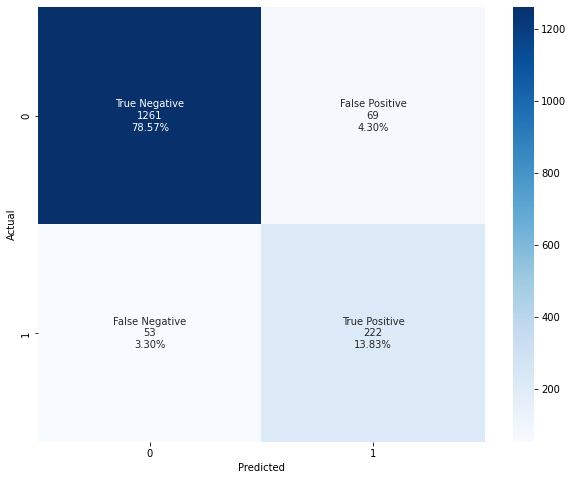

In [72]:
y_test_pred_xg = xg_tuned.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_test_pred_xg)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Feature Importance

In [73]:
def show_feature_importance(model):
    best_model = model.best_estimator_
    feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


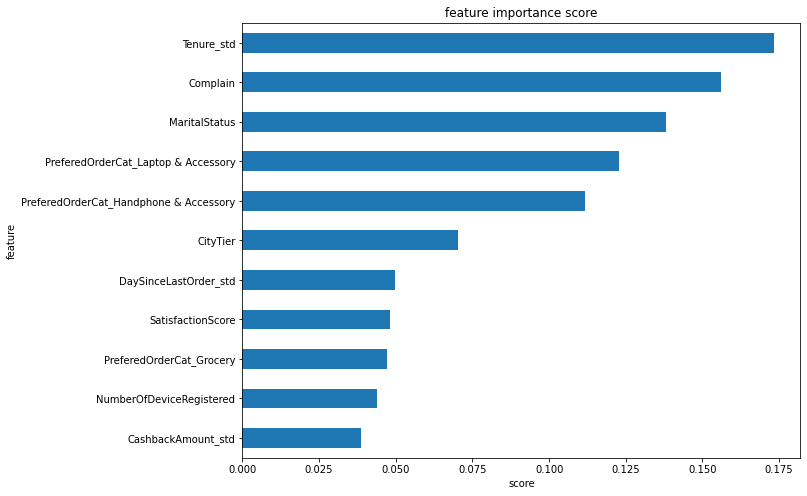

In [74]:
show_feature_importance(xg_tuned)

## Shap Values

In [75]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.0 MB/s eta 0:00:00


 94%|=================== | 1502/1605 [00:13<00:00]       

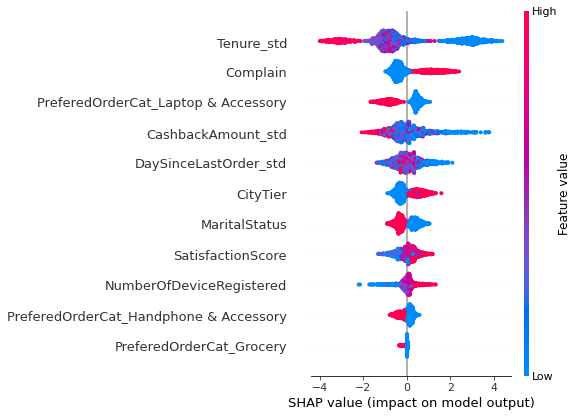

In [76]:
import shap
explainer = shap.Explainer(xg_tuned.best_estimator_, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [77]:
print(shap_values.shape)


(1605, 11)


In [78]:
shap.initjs()

shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

# Business Simulation

## Confusion Matrix Insight

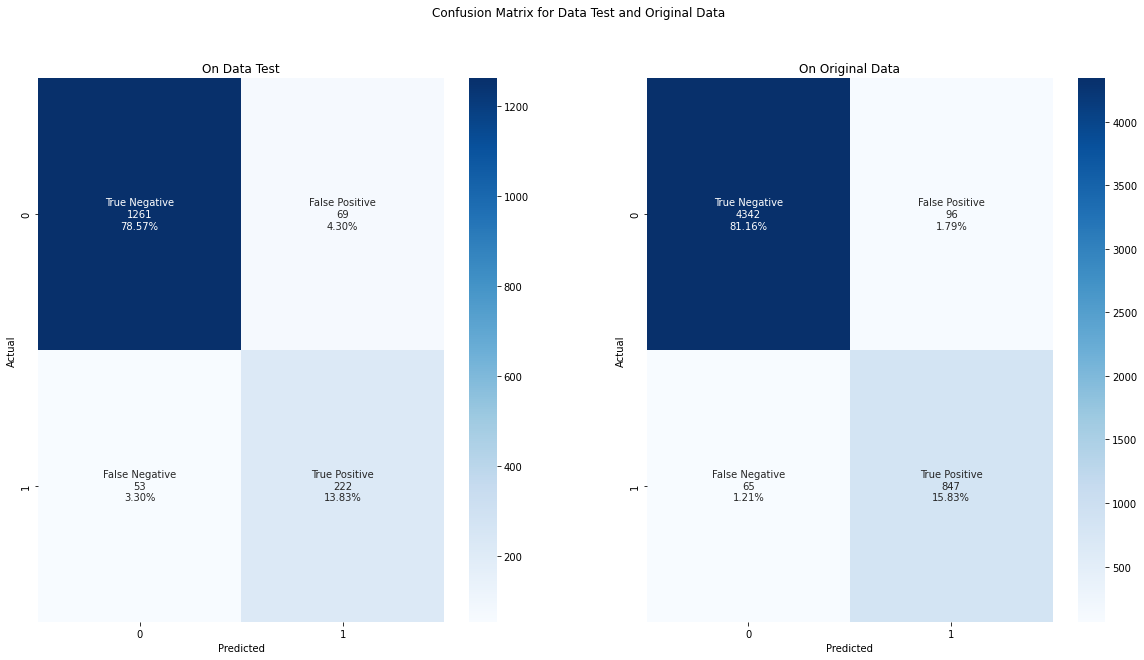

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute first confusion matrix
y_test_pred_xg1 = xg_tuned.predict(X_test)
cf_matrix1 = confusion_matrix(y_test, y_test_pred_xg1)

# Compute second confusion matrix
y_test_pred_xg2 = xg_tuned.predict(X)
cf_matrix2 = confusion_matrix(y, y_test_pred_xg2)

# Define labels for confusion matrices
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts1 = ["{0:0.0f}".format(value) for value in cf_matrix1.flatten()]
group_percentages1 = ["{0:.2%}".format(value) for value in cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)

group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot first confusion matrix
sns.heatmap(cf_matrix1, annot=labels1, fmt='', cmap='Blues', ax=axs[0])
axs[0].set_title('On Data Test')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Plot second confusion matrix
sns.heatmap(cf_matrix2, annot=labels2, fmt='', cmap='Blues', ax=axs[1])
axs[1].set_title('On Original Data')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

# Add title for the whole plot
plt.suptitle('Confusion Matrix for Data Test and Original Data')

# Show the plot
plt.show()


Berdasarkan data yang diperoleh dari confusion matrix untuk data test diatas, dapat dilihat bahwa model menebak jumlah pelanggan yang churn adalah sebesar 17.82%  yang merupakan hasil dari jumlah nilai true positive dan false positive dibagi dengan total keseluruhan customer. Dari keseluruhan jumlah customer yang churn, model berhasil menebak secara tepat umlah pelanggan yang benar benar churn(true positive) adalah sebesar 80%. Lalu model diujikan kembali pada data original dan berhasil melakukan tebakan persentase jumlah pelanggan yang churn dari total pelanggan yaitu sebesar 17.36%. Sedangkan persentase model menebak secara tepat customer yang benar benar churn adalah sebesar 93%. Sehingga dengan hasil tersebut, perusahaan dapat mencegah kehilangan customer hingga 93% dengan berbagai macam cara yang akan disampaikan melalui business insight.

Dan dapat dilihat juga, bahwa setelah model di aplikasikan pada dataset original sebelum nya, model kita bisa memfilter dengan lebih efisien untuk customer yang perlu di approach.

Karna sebelum menggunakan model, kita memliki
- (True Positive) 948 customers
- (False Positive) 4682 customers
Jadi secara keseluruhan kita harus menjangkau 5630 customers dalam upaya mencegah customer churn.

Sedangkan setelah di modelling, kita memiliki
- (True Positive) 864 customers
- (False Positive) 65 customers
Jadi secara keseluruhan kita hanya perlu menjangkau 929 customers, dengan persentase customer churn sebesar 93%

Dengan begini kita dapat melakukan pendekatan kepada customer secara lebih tepat, dan juga mengurangi marketing cost yang tidak on point.

## Feature Importance Insight

- Tenure: Semakin tinggi nilai tenure, semakin rendah dampaknya terhadap churn. Dengan demikian, kami menyarankan agar perusahaan dapat meningkatkan durasi sejak pembelian pertama customer tersebut ke pembelian terakhir. Artinya, customer tersebut sudah lama menjadi customer perusahaan tersebut. Untuk meningkatkan hal ini, perlu usaha jangka panjang agar dapat mempertahankan customer tersebut dan mendorong pembelian dengan memberikan berbagai macam bentuk promosi. Langkah ini dapat membantu agar customer tidak churn.

- Complain: Semakin tinggi nilai complain, semakin besar dampaknya terhadap churn.  Dengan demikian, kami menyarankan agar perusahaan dapat mengambil langkah untuk menurunkan complain dari customer. Hal ini dapat dilakukan dengan meningkatkan kualitas pelayanan yang diberikan dan pengalaman yang dirasakan customer ketika melakukan pembelian di ecommerce. 

- CashbackAmount: Semakin rendah nilai cashback, semakin tinggi dampaknya terhadap churn. Artinya, perusahaan perlu memberikan cashback agar kemungkinan customer akan churn semakin rendah. 

- PreferedOrderCat_Laptop & Accessory,  PreferedOrderCat_Handphone & Accessory, PreferedOrderCat_Grocery: Semakin tinggi nilai fitur ini, semakin rendah dampaknya terhadap churn. Dengan demikian, perusahaan perlu meningkatkan promosi pada kategori laptop & accessory, handphone & accessory, serta grocery agar pembelian meningkat dan customer tidak churn.

- DaySinceLastOrder: Data feature importance menunjukan Semakin lama hari terakhir customer order, maka customer tersebut sebetulnya tidak memiliki impact yang kuat terhadap churn, sehingga perusahaan dapat lebih fokus kepada customer yang lebih sedikit hari terakhir order nya yaitu dengan menawarkan program loyalitas seperti poin reward, kupon diskon atau cashback bagi pelanggan sehingga dapat membantu meningkatkan kepercayaan pelanggan dan memotivasi mereka untuk berbelanja kembali di lain waktu.

- MaritalStatus: Data menunjukan bahwa marital status memiliki kemungkinan yang sama untuk menjadi churn, namun status "Single" lebih rentan menjadi churn di bandingkan dengan Status "Married" sehingga perusahaan dapat lebih fokus untuk memberikan promosi kepada customer dengan status "Single" baik itu customer yang masih belum menikah maupun yang sudah bercerai.

- CityTier: Kategori City Tier yang tinggi (Kategori 3) menunjukan bahwa customer tersebut memiliki impact yang kuat terhadap churn sehingga Customer yang berada pada kategori tersebut perlu treatment yang lebih baik dan fokus untuk meningkatkan pelayanan, menyesuaikan penawaran produk serta promo diskon nya.

- SatisfactionScore: Semakin rendah nilai kepuasan pelanggan, semakin rendah dampaknya terhadap churn. 

- NumberOfDeviceRegistered: Semakin rendah jumlah perangkat yang digunakan customer, semakin rendah dampaknya terhadap churn. Artinya, perusahaan dapat mengambil langkah untuk membatasi jumlah perangkat yang dapat didaftari (sign in) oleh customer.

## Business Recommendation

1. Customer Retention Program:
Perusahaan dapat memperkuat program retensi pelanggan dengan memberikan insentif atau keuntungan khusus bagi pelanggan setia yang telah berlangganan selama periode tertentu. Program ini dapat berupa diskon eksklusif, cashback, atau bonus poin reward.

2. Kategori Produk Terlaris: 
Perusahaan dapat menganalisis kategori produk yang paling diminati oleh pelanggan dan memastikan bahwa produk-produk tersebut selalu tersedia dalam stok dan promosi secara konsisten untuk menjaga kepuasan pelanggan. Perusahaan juga dapat melakukan analisis pasar yang lebih mendalam untuk menentukan kategori produk yang paling diminati oleh customer.

3. Peningkatan Kualitas Layanan Pelanggan: 
Perusahaan dapat meningkatkan kualitas layanan pelanggan dengan mengoptimalkan proses penanganan keluhan dan meningkatkan responsivitas pada pelanggan di kota-kota dengan kategori City Tier yang tinggi. Hal ini dapat membantu meningkatkan tingkat kepuasan pelanggan dan mengurangi risiko churn.

4. Perluasan Jangkauan Produk: 
Perusahaan dapat mengoptimalkan pengembangan produk baru dan menyesuaikan penawaran dengan minat dan preferensi pelanggan. Selain itu, perusahaan dapat mengurangi jumlah perangkat yang dapat didaftarkan oleh pelanggan untuk memastikan kualitas pengalaman pengguna yang lebih baik.

5. Program Loyalitas Berbasis Waktu: 
Perusahaan dapat meluncurkan program loyalitas berbasis waktu yang memberikan insentif kepada pelanggan yang sering melakukan pembelian dalam periode waktu tertentu. Program ini dapat berupa diskon, cashback atau poin reward yang dapat ditukarkan pada pembelian berikutnya. Hal ini dapat membantu meningkatkan frekuensi pembelian dan mengurangi risiko churn.